<a href="https://colab.research.google.com/github/DanielRam94m/College_ECCI_UCR/blob/master/Laboratorio_03_Apendizaje_Mecanico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Costa Rica
# Aprendizaje Mecánico
# Laboratorio 03 - Regresión Lineal
# Daniel Ricardo Ramírez Umaña, B45675

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Leer archivo y guardarlo en un dataframe

In [111]:
def get_X_and_Y(data, feature):
  y_df = data[feature]
  x_df = data.loc[:, data.columns != feature]
  x_data = x_df.to_numpy()
  y_data = y_df.to_numpy()
  bias = np.ones(x_data.shape[0])
  x_data = np.insert(x_data, 0, bias, axis=1)
  return x_data, y_data


### Función que recibe dos arreglos de tipo flotante (uno real y uno predicho) calcula y retorna el error cuadrático medio de dicha predicción

### Cost = $\frac{1}{m}\sum|Y_p - Y|^2$

In [112]:
def MSE(y_true, X, W):
  y_true.shape = (y_true.shape[0],1) 
  return np.sum((np.matmul(X,W) - y_true)**2 / len(y_true))

### Función que recibe dos arreglos de tipo flotante (uno real y uno predicho) calcula y retorna el error absoluto medio de dicha predicción

In [113]:
def d_MSE(y_true, X, W):
  y_true.shape = (y_true.shape[0],1) 
  return 2 * np.matmul((np.matmul(X,W) - y_true).transpose(), X).transpose() / len(y_true)

### Función que recibe dos arreglos de tipo flotante (uno real y uno predicho) calcula y retorna el coeficiente de prede determinación R^2 de dicha predicción

In [114]:
def score(y_true, y_predict):
  matriz_correlacion = np.corrcoef(y_true, y_predict)
  correlacion = matriz_correlacion[0,1]
  return correlacion**2

### El Modelo

In [121]:
class LinearRegression() :
      
  def __init__( self):
    self.X = None
    self.Y = None
    self.W = None
    self.max_epochs = None
    self.threshold = None
    self.learning_rate = None
    self.momentum = None
    self.decay = None
    self.error = None
    self.regularization = None
    self._lambda = None

  # Funsión que actualiza los pesos
  def update_weights(self, d_mse):
    return self.W - d_mse * self.learning_rate

  # Funsión que realiza la predicción
  def predict(self, X, W):
    return np.matmul(X, W)  
        
  # Function for model training     
  def fit( self, X, Y , max_epochs=100, threshold=0.01, learning_rate=0.001, momentum=0, decay=0, error='mse', regularization='none', _lambda=0):

    self.X = X
    self.Y = Y
    self.learning_rate = learning_rate
    self.max_epochs = max_epochs

    # Primero el vector de pesos W se crea con valores aleatorios
    tam = self.X.shape[1]
    self.W = np.random.standard_normal(tam)
    self.W.shape = (self.W.shape[0], 1)

    # Vector de errores a predecir
    errors_vector = []

    for m_e in range(0, self.max_epochs):
      mse = MSE(self.Y, self.X, self.W)
      d_mse = d_MSE(self.Y, self.X, self.W)
      errors_vector.append(mse)
      self.W = self.update_weights(d_mse)

    # Puerba de actualizar pesos
    sns.lineplot(y = errors_vector, x = range(len(errors_vector)))
    plt.show()

    return self.W


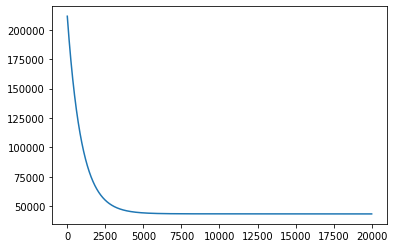


Cada atrubuto tiene peso:
 [[0.24889514]
 [4.36909281]
 [6.63353386]
 [4.1336602 ]
 [1.73870392]
 [1.29842966]]

Se predijo:
 [[298.69382876]
 [664.78707442]
 [631.63106524]
 [377.0328159 ]
 [345.75739122]
 [235.99053191]
 [369.1609591 ]
 [431.19914505]
 [345.50136128]
 [680.15834874]
 [431.22321178]
 [356.36906386]]

Peso real:
 [  80. 1100.  850.  145.  120.   40.  170.  260.  135. 1100.  300.  145.]


In [122]:
data = pd.read_csv('fish_perch.csv')
feature = 'Weight'

# Se generan los datasets X y Y
X, Y = get_X_and_Y(data, feature)

# Crea el datasets de entrenamiento y de prueba
X_training, X_testing, Y_training, Y_testing = train_test_split( X, Y, test_size = 0.2,random_state=21)

# Se crea instancia del modelo
my_LR = LinearRegression()

# Se entrena el modelo
mis_pesos = my_LR.fit(X_training, Y_training, 20000, 0.01, 0.0000001, 0, 0, 'mse', 'none', 0)
print('\nCada atrubuto tiene peso:\n', mis_pesos)

# Se testea el modelo
predicho = my_LR.predict(X_testing, mis_pesos)
print('\nSe predijo:\n', predicho)
print('\nPeso real:\n', Y_testing)